# Executive Summary

This analysis aims to explore the sales dataset to understand overall performance, identify the most profitable regions and item types, and analyze revenue and profit trends. By examining sales channels, order priorities, and profit margins, this project provides actionable insights that can help improve business decision-making and optimize sales strategies.

# import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.dates as mdates
import warnings 
warnings.filterwarnings('ignore')

# Read Data

In [2]:
data = pd.read_csv('/kaggle/input/sales1000-csv/sales1000.csv')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,8/1/2011,590768182,9/7/2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,5/12/2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73


In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [4]:
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
995,Middle East and North Africa,Azerbaijan,Snacks,Offline,C,4/18/2010,534085166,4/25/2010,6524,152.58,97.44,995431.92,635698.56,359733.36
996,Europe,Georgia,Baby Food,Offline,H,8/1/2011,590768182,9/7/2011,288,255.28,159.42,73520.64,45912.96,27607.68
997,Middle East and North Africa,United Arab Emirates,Vegetables,Online,C,5/12/2011,524363124,6/28/2011,9556,154.06,90.93,1472197.36,868927.08,603270.28
998,Europe,Finland,Household,Offline,L,1/25/2016,289606320,2/14/2016,9801,668.27,502.54,6549714.27,4925394.54,1624319.73
999,Europe,Portugal,Cereal,Offline,C,4/10/2014,811546599,5/8/2014,3528,205.70,117.11,725709.60,413164.08,312545.52


# Basic Explore Data

In [5]:
data.shape

(1000, 14)

In [6]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB


In [8]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+03,1000.000000,1000.00000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.496813e+08,5053.988000,262.10684,184.965110,1.327322e+06,9.361192e+05,3.912026e+05
std,2.571334e+08,2901.375317,216.02106,175.289311,1.486515e+06,1.162571e+06,3.836402e+05
min,1.029280e+08,13.000000,9.33000,6.920000,2.043250e+03,1.416750e+03,5.326100e+02
25%,3.280740e+08,2420.250000,81.73000,56.670000,2.811919e+05,1.649319e+05,9.837612e+04
50%,5.566097e+08,5184.000000,154.06000,97.440000,7.549392e+05,4.647261e+05,2.772260e+05
75%,7.696945e+08,7536.750000,421.89000,263.330000,1.733503e+06,1.141750e+06,5.484568e+05
max,9.955298e+08,9998.000000,668.27000,524.960000,6.617210e+06,5.204978e+06,1.726181e+06


In [9]:
data.describe(include='O').transpose()

,count,unique,top,freq
Region,1000,7,Europe,267
Country,1000,185,Cuba,11
Item Type,1000,12,Beverages,101
Sales Channel,1000,2,Offline,520
Order Priority,1000,4,L,268
Order Date,1000,841,7/19/2010,3
Ship Date,1000,835,6/8/2011,3


# Missing Values & Duplicates

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

Insight:
There are no significant missing values or duplicate records affecting the analysis.

# Data Processing

In [12]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [13]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

Insight:
Creating shipment duration enables analysis of shipping efficiency and its relationship with order priority

# Feature Engineering

In [14]:
data['Shipment Days'] = (data['Ship Date'] - data['Order Date']).dt.days

In [15]:
data['Month']   = data['Order Date'].dt.month
data['Year']    = data['Order Date'].dt.year
data['WeekDay'] = data['Order Date'].dt.day_name()

In [16]:
data['YearMonth'] = data['Order Date'].dt.to_period('M').astype(str)

In [17]:
data['Profit Margin %'] = (data['Total Profit'] / data['Total Revenue']) * 100

# Distribution of Total Profit

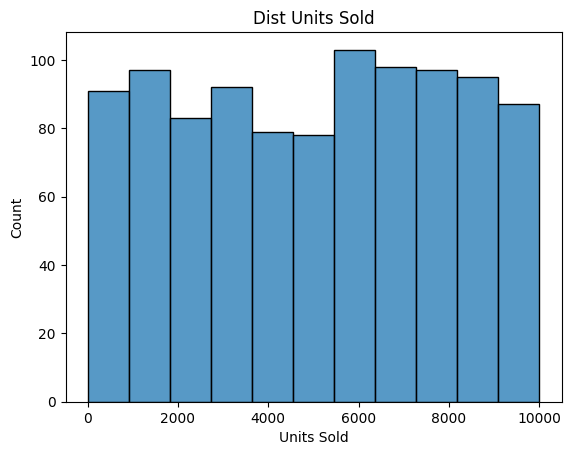

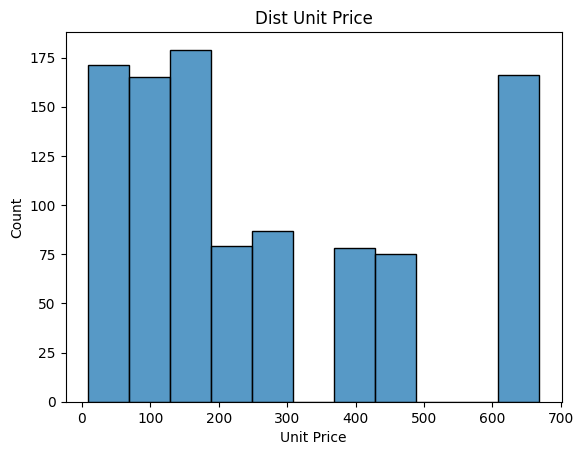

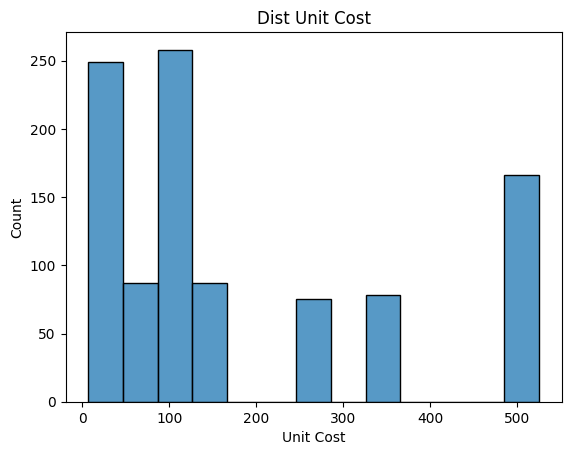

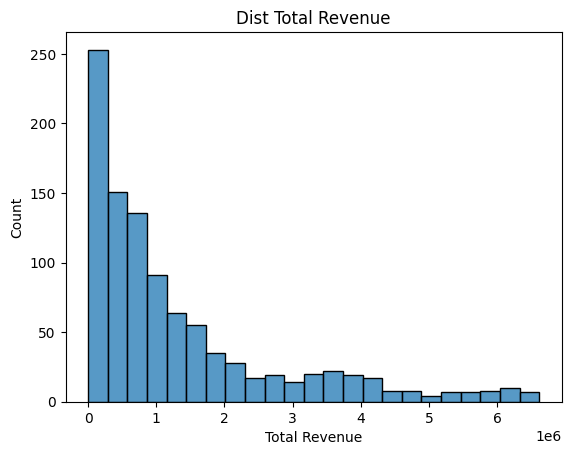

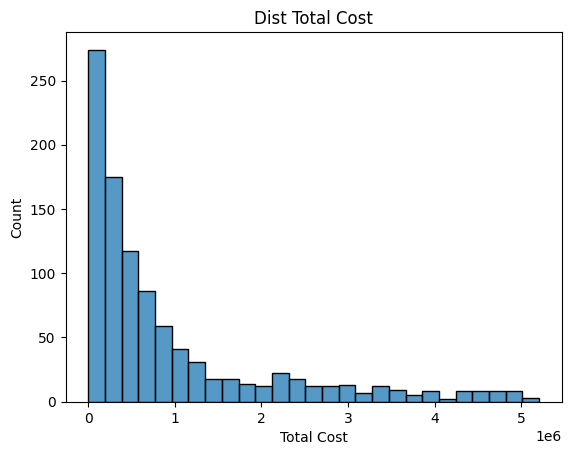

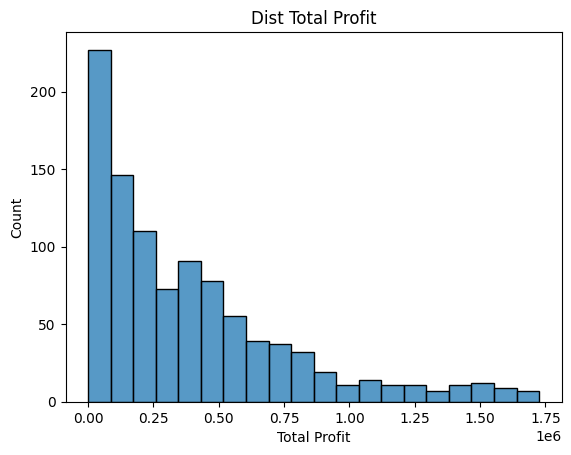

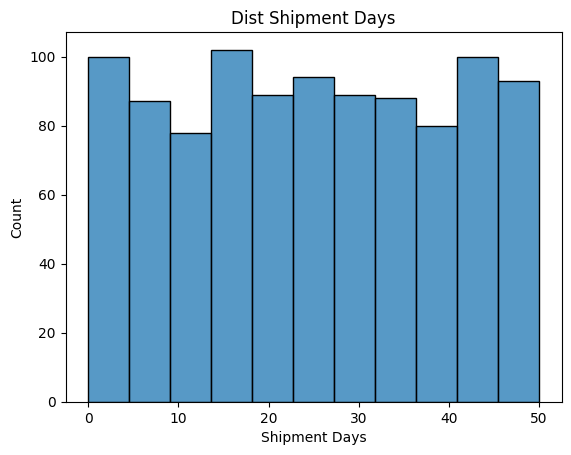

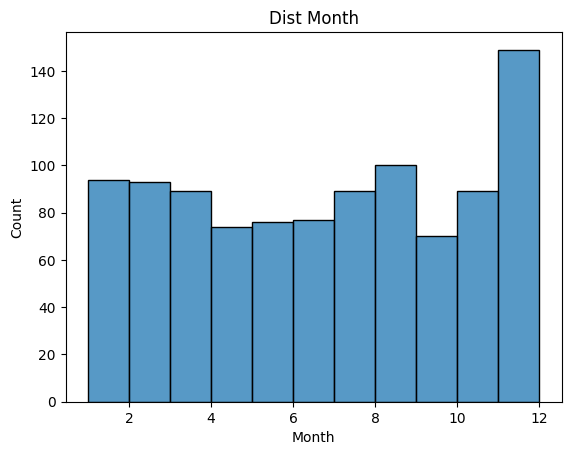

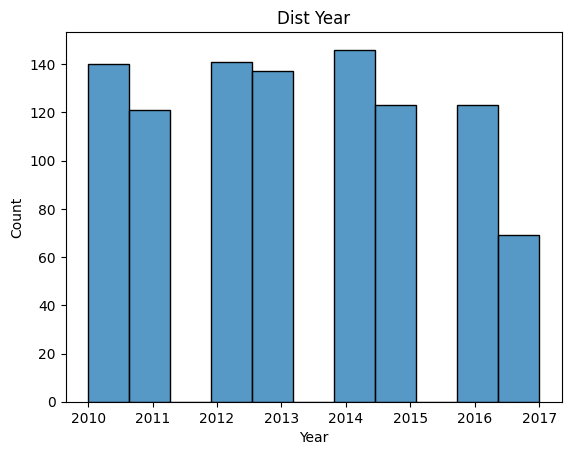

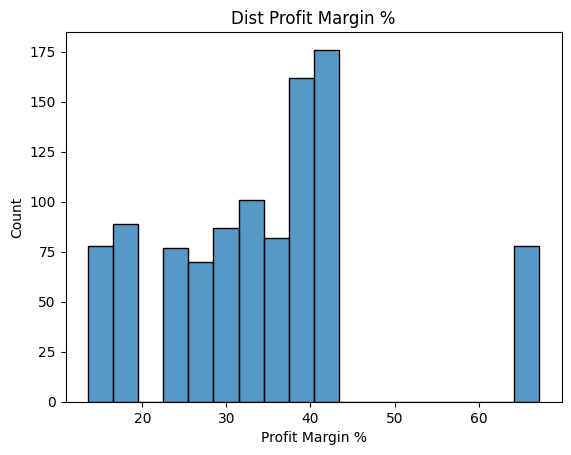

In [18]:
for  i in data.select_dtypes(include='number'):
    if i!='Order ID':
        plt.title(f'Dist {i}')
        sns.histplot(data[i])
        plt.show()


Insight:
The distribution shows the presence of very large transactions that influence overall profit patterns.

# Correlation Matrix

<Axes: >

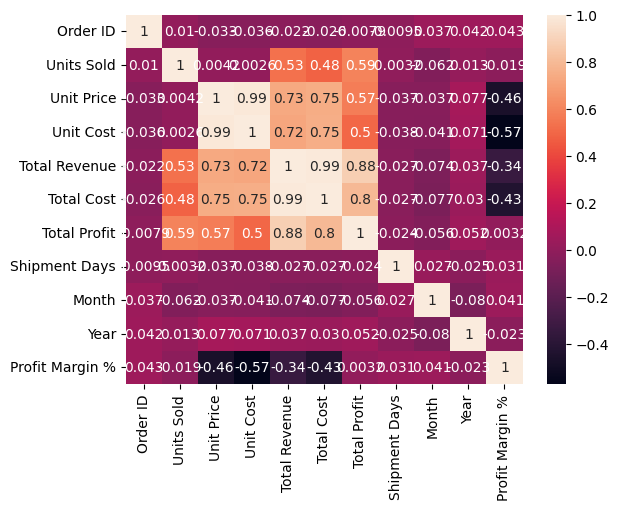

In [19]:
corr_data=data.select_dtypes(include='number').corr()
sns.heatmap(corr_data,annot=True)

Insight:
There is a very strong positive correlation between Total Revenue and Total Profit.

# Profit by Region

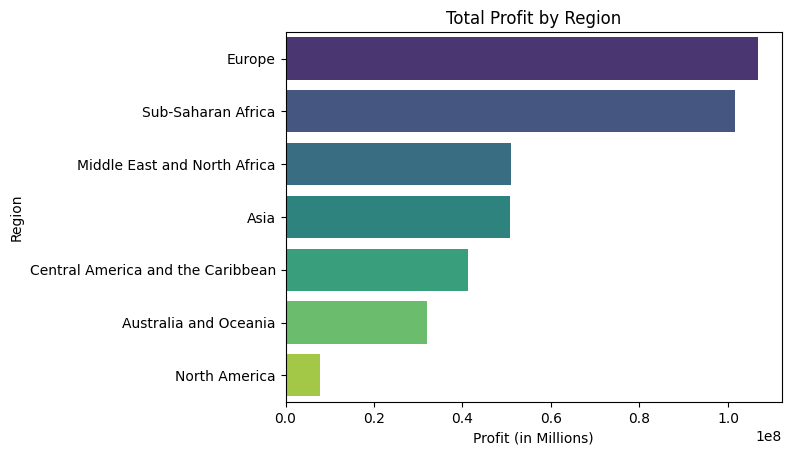

In [20]:
region_profit = data.groupby('Region')['Total Profit'].sum().sort_values(ascending=False).reset_index()

sns.barplot(data=region_profit, x='Total Profit', y='Region', palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Profit (in Millions)')
plt.show()

Insight:
A small number of regions generate the majority of the total profit, indicating key markets.

# Top 10 Countries by Profit

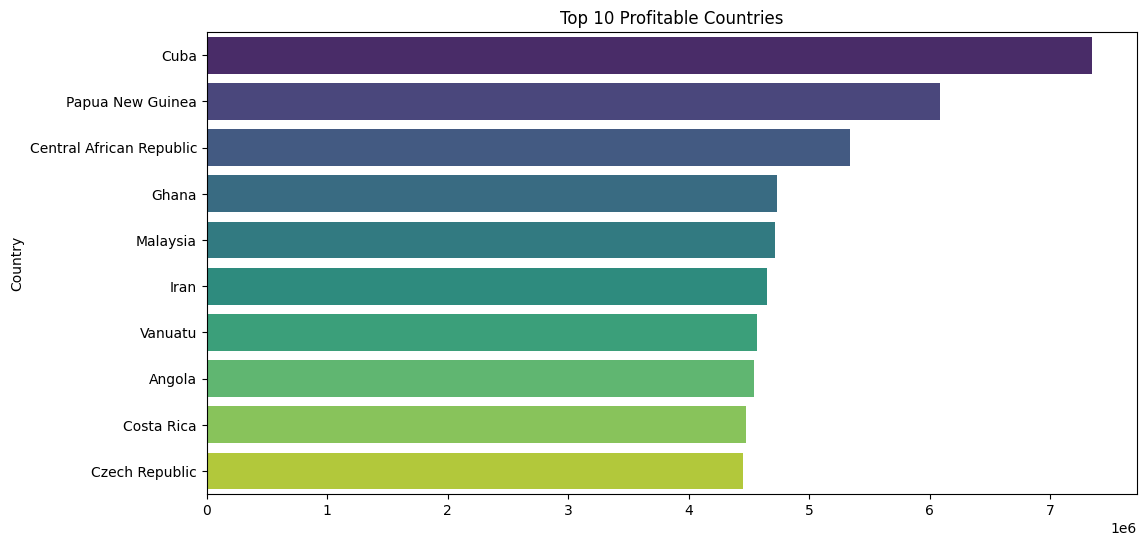

In [21]:
country_profit = data.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_profit.values, y=country_profit.index, palette='viridis')
plt.title('Top 10 Profitable Countries')
plt.show()

Insight:
A limited number of countries contribute heavily to the company’s overall profitability.

# Revenue vs Profit by Item Type

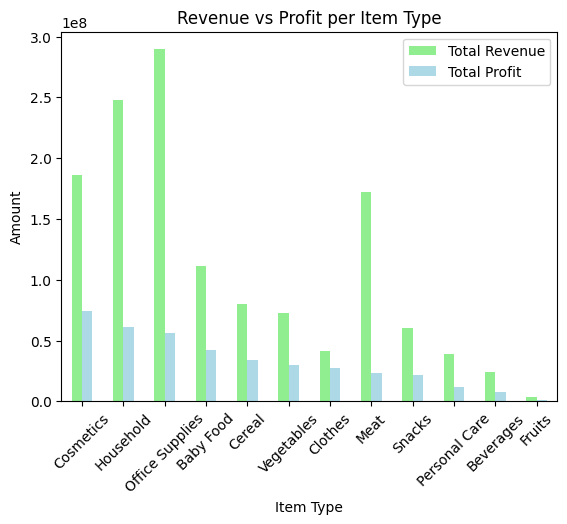

In [22]:
item_analysis = data.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum().sort_values(by='Total Profit', ascending=False)

item_analysis.plot(kind='bar' ,  color=['lightgreen', 'lightblue'])
plt.title('Revenue vs Profit per Item Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

Insight:
Not all high-revenue products generate high profit margins.

# Revenue vs Profit Scatter

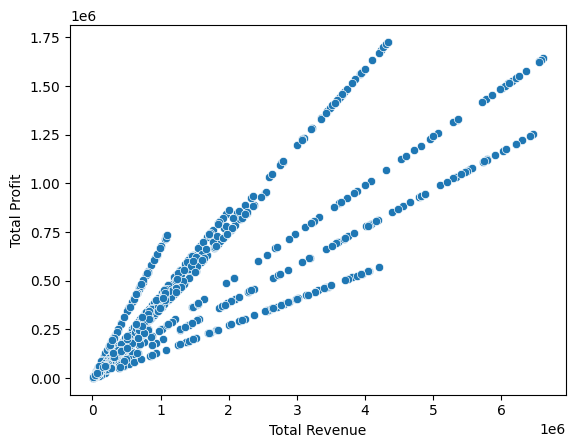

In [23]:
sns.scatterplot(data=data, x='Total Revenue', y='Total Profit')
plt.show()

Insight:
There is a clear positive relationship between revenue and profit.

# Sales Channel Distribution

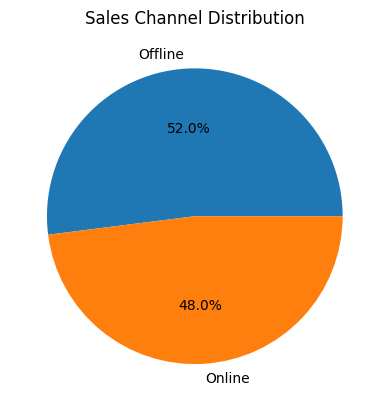

In [24]:
counts = data['Sales Channel'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Sales Channel Distribution')
plt.show()


Insight: One sales channel dominates the overall sales performance.

# Monthly Profit Trend

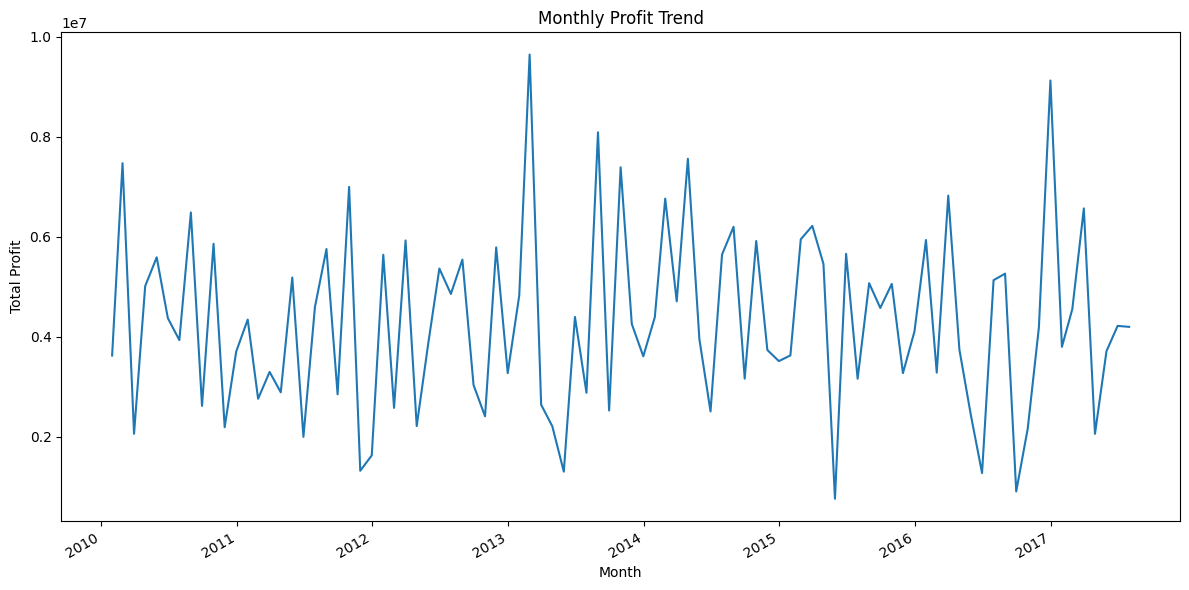

In [25]:
monthly_profit = (
    data
    .groupby(pd.Grouper(key='Order Date', freq='M'))['Total Profit']
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
plt.plot(monthly_profit['Order Date'], monthly_profit['Total Profit'])

plt.gcf().autofmt_xdate()  
plt.title('Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()


Insight:
This visualization correctly shows the monthly profit trend over time using proper date grouping without any date formatting issues.

# Profit by WeekDay

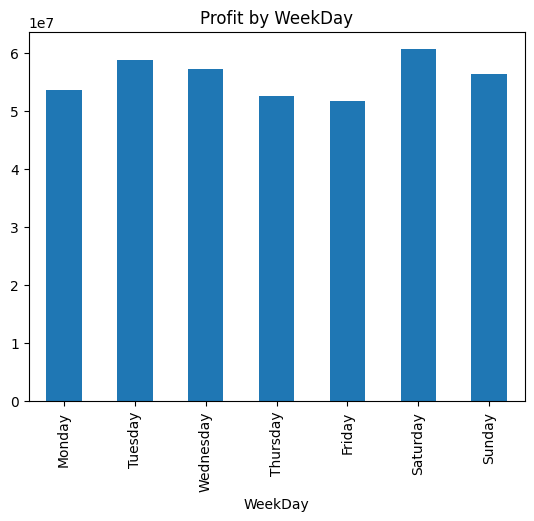

In [26]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_profit = data.groupby('WeekDay')['Total Profit'].sum().reindex(order)

weekday_profit.plot(kind='bar')
plt.title('Profit by WeekDay')
plt.show()


Insight: Certain days of the week consistently achieve higher profits than others.

# Shipping vs Order Priority

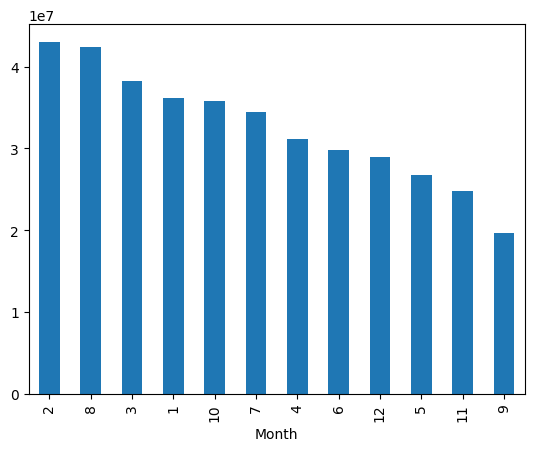

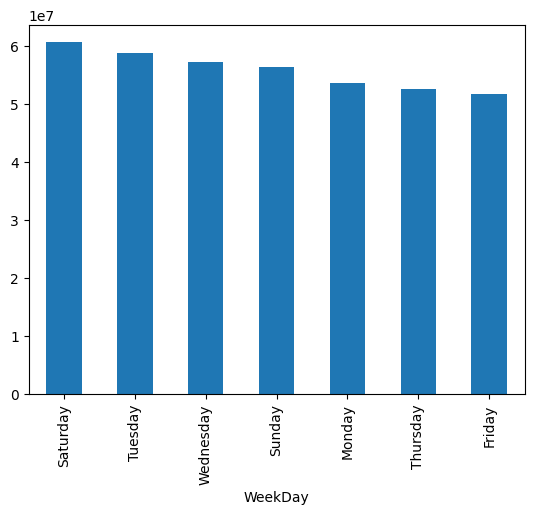

In [27]:
monthly_profit = data.groupby('Month')['Total Profit'].sum().sort_values(ascending=False)
monthly_profit.plot(kind='bar')
plt.show()

weekday_profit = data.groupby('WeekDay')['Total Profit'].sum().sort_values(ascending=False)
weekday_profit.plot(kind='bar')
plt.show()


Insight: High-priority orders are shipped faster, showing an efficient shipping system.

# Average shipping Days by Order Priority

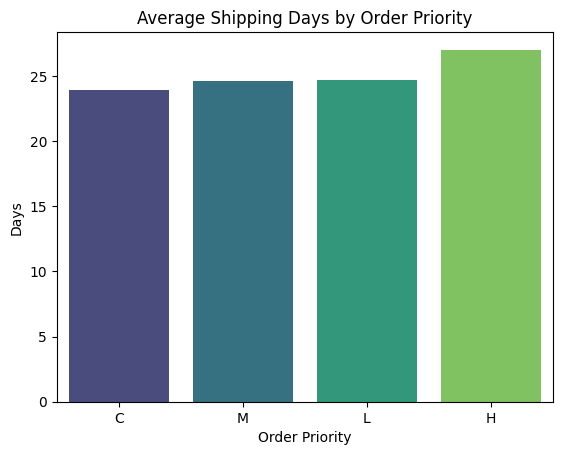

In [28]:

priority_shipping = data.groupby('Order Priority')['Shipment Days'].mean().sort_values()

sns.barplot(x=priority_shipping.index, y=priority_shipping.values, palette='viridis')
plt.title('Average Shipping Days by Order Priority')
plt.ylabel('Days')
plt.show()

The profit margin analysis shows that different item types contribute differently to overall profitability. Some item categories generate high revenue but relatively low profit margins, while others produce smaller revenues with higher margins. This indicates that focusing only on total revenue may be misleading, and profit margin should be considered when evaluating product performance.

# Average shipment Days by Regoin

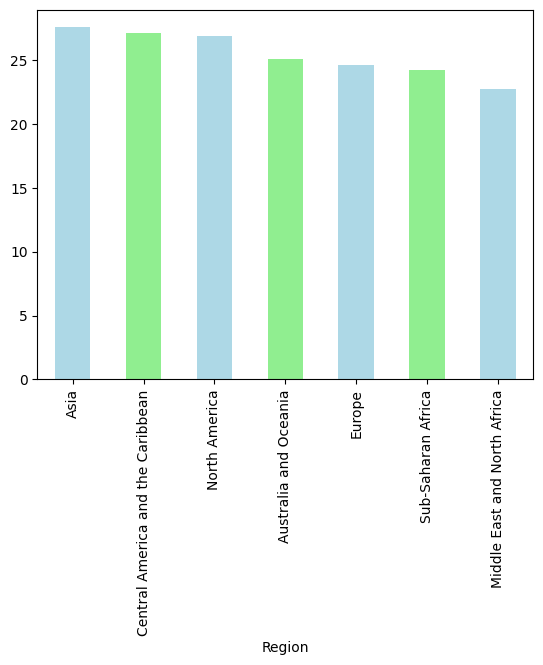

In [29]:
region_ship = data.groupby('Region')['Shipment Days'].mean().sort_values(ascending=False)
region_ship.plot(kind='bar',color=['lightblue','lightgreen'])
plt.show()


# Average Profit Margin by Item Type 

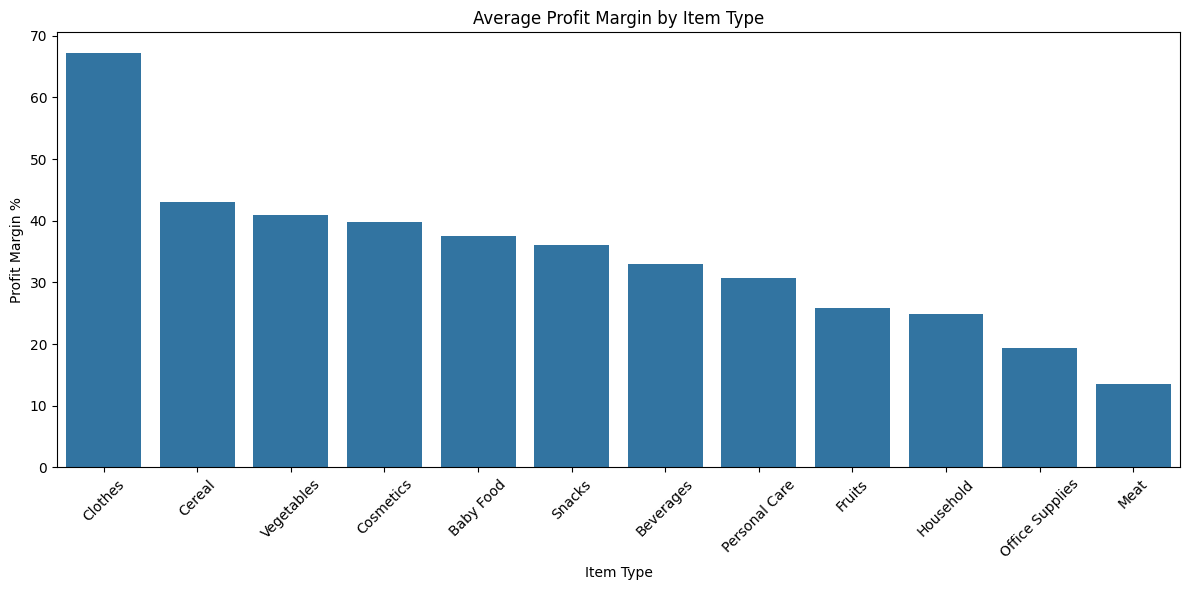

In [30]:
margin_item = (
    data.groupby('Item Type')['Profit Margin %']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
plt.figure(figsize=(12,6))
sns.barplot(x='Item Type', y='Profit Margin %', data=margin_item)
plt.xticks(rotation=45)
plt.title('Average Profit Margin by Item Type')
plt.tight_layout()
plt.show()


Insight:
This chart clearly shows which item types are the most efficient in generating profit. Some products achieve significantly higher average profit margins than others, regardless of sales volume

# Profit per Unit

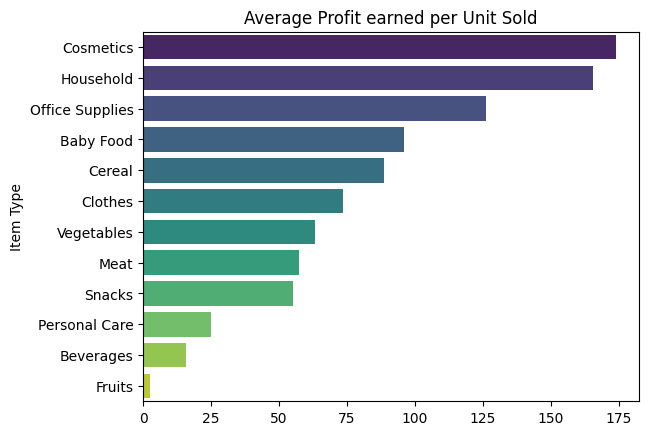

In [31]:
data['Profit per Unit'] = data['Total Profit'] / data['Units Sold']

unit_profit_analysis = data.groupby('Item Type')['Profit per Unit'].mean().sort_values(ascending=False)

sns.barplot(x=unit_profit_analysis.values, y=unit_profit_analysis.index, palette='viridis')
plt.title('Average Profit earned per Unit Sold')
plt.show()

Insight: Some products generate high profit per unit despite low sales volume.

# Outliers Detection

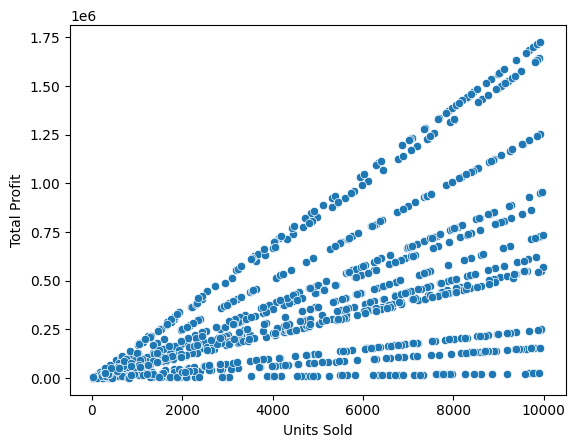

In [32]:
sns.scatterplot(data=data, x='Units Sold', y='Total Profit')
plt.show()



Insight: There are extreme profit values representing very large deals that affect the overall distribution.

In [33]:
data.to_csv('cleaned_sales_data.csv', index=False)
import os
print(os.listdir('/kaggle/working'))

['cleaned_sales_data.csv', '__notebook__.ipynb']


# Final Business Insights

Based on the analysis conducted, several important business insights can be drawn:

Certain regions consistently generate higher revenue and profit, making them strategic markets for growth.

Not all high-revenue item types are highly profitable; profit margin analysis reveals which products truly add value.

Sales channels play a critical role in profitability, and focusing on the most profitable channels can significantly improve overall performance.

Order priority patterns indicate opportunities to improve logistics and inventory management.

Overall, the company should prioritize high-margin products, invest more in top-performing regions, and optimize sales channels to maximize profitability and operational efficiency

# Conclusion

This analysis demonstrates how sales data can be used to extract meaningful insights that support data-driven decision-making. By combining revenue, profit, and margin analysis with visualizations, the business can better understand its strengths and areas for improvement. Future analysis could include time-series forecasting, customer segmentation, or cost optimization to further enhance strategic planning.